In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_raw(fname: str):
    raw_data = list()
    with open(fname) as f:
        raw_data = f.readlines()
    return raw_data

def clean_raw(raw_data):
    clean_data = list()
    for data in raw_data:
        clean_data.append(",".join(data.split()))
    return clean_data

def make_dataframe(clean_data):
    kx = list()
    ky = list()
    kz = list()
    sigma_x = list()
    sigma_y = list()
    sigma_z = list()
    for data in clean_data:
    #     print(data.split(","))
        split_data = data.split(",")
        kx.append(float(split_data[0]))
        ky.append(float(split_data[1]))
        kz.append(float(split_data[2]))
        sigma_x.append(float(split_data[3]))
        sigma_y.append(float(split_data[4]))
        sigma_z.append(float(split_data[5]))
    df = pd.DataFrame.from_dict({
    'kx': kx,
    'ky': ky,
    'kz': kz,
    'sigma_x': sigma_x,
    'sigma_y': sigma_y,
    'sigma_z': sigma_z
    })
    return df

def compute_arctan(df: pd.DataFrame):
    ky_list = list(df['ky'])
    kz_list = list(df['kz'])
    arc_tan_list = list()
    for idx in range(len(ky_list)):
        ky = ky_list[idx]
        kz = kz_list[idx]
        if((ky > 0) and (kz > 0)):
            arc_tan = np.arctan(ky/kz)
            arc_tan_list.append(arc_tan)
        elif((ky < 0) and (kz > 0)):
            arc_tan = np.pi + np.arctan(ky/kz)
            arc_tan_list.append(arc_tan)
        elif((ky < 0) and (kz < 0)):
            arc_tan = np.pi + np.arctan(ky/kz)
            arc_tan_list.append(arc_tan)
        elif((ky > 0) and (kz < 0)):
            arc_tan = 2*np.pi + np.arctan(ky/kz)
            arc_tan_list.append(arc_tan)
        elif((ky >= 0) and (kz == 0)):
            arc_tan_list.append(0)
        elif((ky == 0) and (kz >= 0)):
            arc_tan_list.append(0.5*np.pi)
        elif((ky <= 0) and (kz == 0)):
            arc_tan_list.append(np.pi)
        elif((ky == 0) and (kz <= 0)):
            arc_tan_list.append(1.5*np.pi)
    return np.array(arc_tan_list)

def make_plot_table(x_array, y_array):
    result = dict({
        'arc': x_array.tolist(),
        'sigma': y_array.tolist()
        })
    df = pd.DataFrame.from_dict(result)
    return df

def sort_table(df: pd.DataFrame):
    return df.sort_values(by=['arc'])

def plot_data_table(df: pd.DataFrame):
    plt.plot(df['arc'], df['sigma'])

In [68]:
def main_plot(filename: str, sigma: str):
    raw_data = read_raw(filename)
    clean_data = clean_raw(raw_data)
    df = make_dataframe(clean_data)
    x_array = compute_arctan(df)
    y_array = df[sigma].to_numpy()
    print("cek length :", len(x_array), len(y_array))
    df_plot = make_plot_table(x_array, y_array)
    plot_data_table(sort_table(df_plot))

In [69]:
def main_code(fname1: str, fname2: str, sigma_name: str):
    main_plot(fname1, sigma_name)
    main_plot(fname2, sigma_name)
    plt.savefig(sigma_name + ".eps", format="eps")

cek length : 255 255
cek length : 263 263


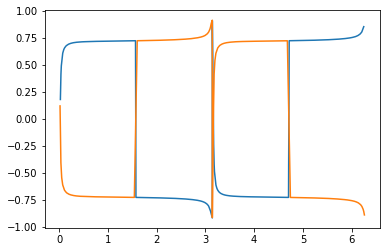

In [72]:
main_code("vbm-FL.Pxyz_47", "vbm-FL.Pxyz_48", "sigma_z")